# Spark Presentation

## Introducti
- what is the case befor spark ?.on
- Apache Spark is an ETL tool used for processing data in parallel over distributed systems, suitable for big data purposes.
- Spark processing starts and ends in memory.
- Spark is used for ML data pipelines too, offering a large set of libraries that support machine learning.
- Spark is a powerful integration tool, offering packages to connect to different systems and services like Kafka, data
bases,- Did you know that Spark can also work as a processing engine in the Hadoop ecosystem, using HDFS for storage, and can be interacted with through APIs like  ache
 Livy?
- Let's dig deep into Spark architecture.


## Spark Architecture

Spark follows a master-slave architecture which includes the following main components:
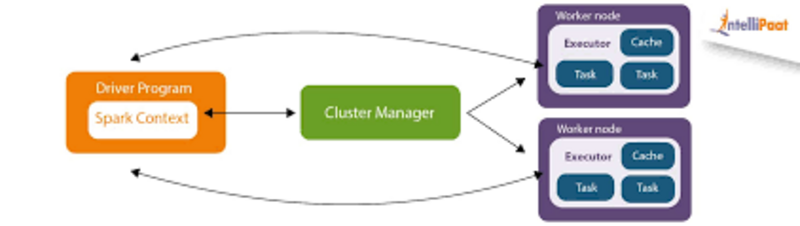


### Components

1. **Driver**
    - The driver is the process that runs the main() function of the application and creates the SparkContext.
    - It converts the user program into tasks and schedules them to run on executors.

2. **Executor**
    - Executors are distributed agents that run tasks on worker nodes.
    - They store data in memory or disk storage and perform data processing.

3. **Cluster Manager**
    - The cluster manager is an external service responsible for acquiring resources on the cluster.
    - Spark supports various cluster managers, including Standalone, Apache Mesos, YARN, and Kubernetes.

### Execution Flow

1. **Job Submission**
    - The driver program contacts the cluster manager to allocate resources.
    - The cluster manager launches executors on worker nodes.

2. **Task Execution**
    - The driver sends tasks to the executors based on the data partitioning.
    - Executors perform the tasks and report the status and results back to the driver.

3. **Data Processing**
    - Data is processed in parallel across multiple executors.
    - Intermediate data is often kept in memory to speed up processing.

4. **Result Collection**
    - The results of the tasks are collected and aggregated by the driver.
    - The final results are returned to the user program


## Dployment use case: Let's see the architecture that we discussed how to be deployed by Docker for example...

In [ ]:
#### There exists two wyas to Deploy spark
    - Install it as standalone on you local machine
    - using spark or K8S

links for docker iimage and docker compose file


 ---

#### Anyone see a simalirty in the architecture of spark and Hadoop MapReduce to execute a job ?

# .
# .
# .
# .

## YARN with MapReduce
In the YARN framework, MapReduce is implemented as one type of application that YARN can manage. This implementation is called MapReduce 2 (MRv2) or YARN MapReduce. Here’s how it works:

### ResourceManager (Master):
- Manages the overall resources of the cluster.
- Receives job submission requests and allocates resources (containers) for the jobs.
  
### NodeManager (Worker):
- Manages resources on each node (CPU, memory, disk).
- Launches containers to run tasks and monitors their resource usage.
- Reports the status and resource availability of the node to the ResourceManager.
  
### ApplicationMaster (Specific to MapReduce):
- Each MapReduce job has its own ApplicationMaster.
- The ApplicationMaster requests resources (containers) from the ResourceManager to run the map and reduce tasks.--
- Coordinates the execution of the map and reduce tasks, handling data locality, task monitoring, and fault tolerance.

FYI: Please when you start compare spark with hadoop just compare the computeing engine which is MapReduce component in Hadoop.


## this is the MapReduce architecture
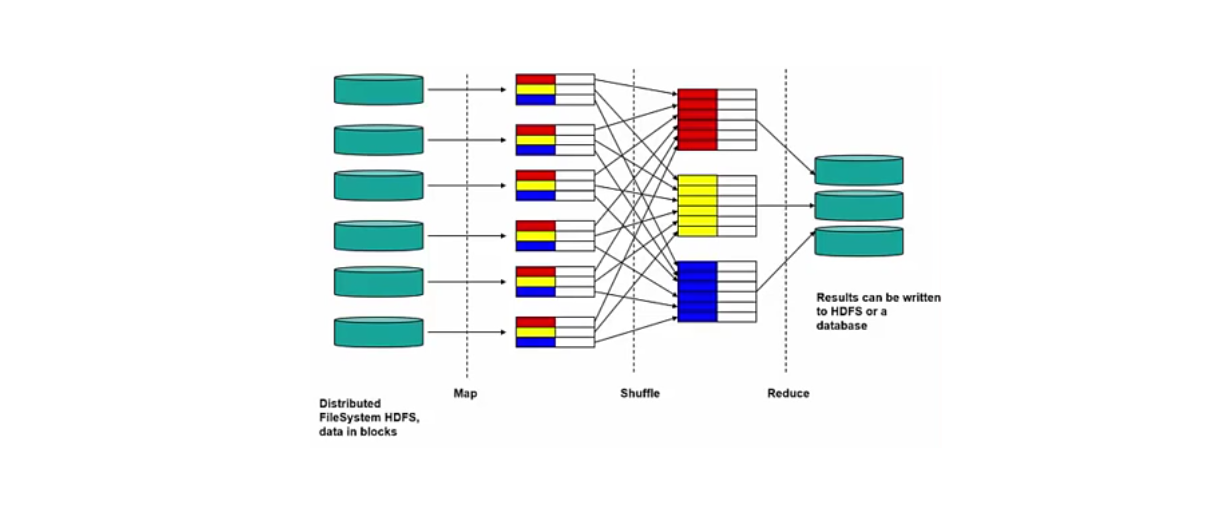

#### We will not dig deep into MapReduce, but I want to let you know something. MapReduce has three phases: Map, Shuffle and Sort, and Reduce.
#### After finishing each step, the result has to be saved to an intermediate layer (to the disk) for the next stage. This is the reason why MapReduce is slower than Spark, because of the number of I/O operations that happen.

#### Spark, on the other hand, addresses this problem by keeping most of the data in memory throughout the processing lifecycle. Instead of writing intermediate data to disk, Spark leverages its Resilient Distributed Dataset (RDD) abstraction to keep data in memory as much as possible. This reduces the I/O operations significantly and speeds up processing times. Spark's in-memory computation and directed acyclic graph (DAG) execution model allow for better optimization and execution planning, making it much faster than the traditional MapReduce paradi

FYI: it's said that spark is faster that Hadoop MapReduce with 100 times

- I know that not much people familiar with that spark use DAG within each job to run it in best way as it possible, so i need you read this post i wrote before about "How Spark Run Your job ?".
  
    https://www.linkedin.com/posts/mohamed-younies-%F0%9F%94%BB-82b715225_catalyst-optimizer-activity-7170125931951472641-NSbJ?utm_source=share&utm_medium=member_desktopgm.



---

## What if the most of our jobs in LigaData Runs as Spark Jobs?
- We will reduce the hits of the database engines.
- the avarage times which consumed to execute a job on presto will be reduced.
- will use our avaliable resurces CPUs and RAMs insted of using the resources of the DBs.
  

---

# Now we are ready for a use case to see how to write code in spark, and how spark distrbute the jobs across the workers

### Writing Code in Spark

Writing code in Spark might seem complex at first, but there are options suitable for everyone. Spark offers different APIs to write code, so let's discuss them:

#### SCALA
- Spark is primarily written in Scala, making it Spark’s “default” language. This presentation will include Scala code examples wherever relevant.

#### JAVA
- Even though Spark is written in Scala, Spark’s authors have been careful to ensure that you can write Spark code in Java. This presentation will focus primarily on Scala but will provide Java examples where relevant.

#### PYTHON
- Python supports nearly all constructs that Scala supports. This presentation will include Python code examples whenever we include Scala code examples and a Python API exists.

#### SQL
- Spark supports ANSI SQL 2003 standard. This makes it easy for analysts and non-programmers to leverage the big data powers of Spark. This presentation will include SQL code examples wherever relevant.

#### R
- Spark has two commonly used R libraries, one as a part of Spark core (SparkR) and another as an R community-driven package (sparklyr). We will cover these two different integra tons in ParII: Ecosystem.


## Our use case will use Python (Pyspark) and SQl APIs

In [30]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
# what is the session in spark

# RDD
# dataset 
# DF

#convert spark df to pytjon df and the opsit
#note:


In [31]:
spark =SparkSession\
    .builder\
    .getOrCreate()

In [32]:
df= spark.read.csv('./online_retail.csv', header=True)

In [27]:
df.show(5)

+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
|InvoiceNo|StockCode|         Description|Quantity|   InvoiceDate|UnitPrice|CustomerID|       Country|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
| 53636511|   85123A|WHITE HANGING HEA...|       6|12/1/2010 8:26|     2.55|     17851|United Kingdom|
| 53636511|    71053| WHITE METAL LANTERN|       6|12/1/2010 8:26|     3.39|     17851|United Kingdom|
| 53636511|   84406B|CREAM CUPID HEART...|       8|12/1/2010 8:26|     2.75|     17851|United Kingdom|
| 53636511|   84029G|KNITTED UNION FLA...|       6|12/1/2010 8:26|     3.39|     17851|United Kingdom|
| 53636511|   84029E|RED WOOLLY HOTTIE...|       6|12/1/2010 8:26|     3.39|     17851|United Kingdom|
+---------+---------+--------------------+--------+--------------+---------+----------+--------------+
only showing top 5 rows



In [35]:

# Partition the data by the 'Country' column with a specified number of partitions
num_partitions = 3  # Adjust this number based on the size of your dataset and cluster configuration
partitioned_df = df.repartition(num_partitions, "Country")

# Show the number of partitions
print("Number of partitions: ", partitioned_df.rdd.getNumPartitions())

# Perform a transformation: Calculate total revenue per country
revenue_per_country = partitioned_df.withColumn("Revenue", col("Quantity") * col("UnitPrice")) \
                                    .groupBy("Country") \
                                    .sum("Revenue") \
                                    .withColumnRenamed("sum(Revenue)", "TotalRevenue")

# Show the result
revenue_per_country.show()
revenue_per_country.explain()

Number of partitions:  3
+--------------+------------------+
|       Country|      TotalRevenue|
+--------------+------------------+
|           UAE|22.200000000000003|
|United Kingdom|            139.12|
|         Egypt|            278.73|
+--------------+------------------+

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[Country#263], functions=[sum(Revenue#377)])
   +- HashAggregate(keys=[Country#263], functions=[partial_sum(Revenue#377)])
      +- Project [Country#263, (cast(Quantity#259 as double) * cast(UnitPrice#261 as double)) AS Revenue#377]
         +- Exchange hashpartitioning(Country#263, 3), REPARTITION_BY_NUM, [plan_id=340]
            +- FileScan csv [Quantity#259,UnitPrice#261,Country#263] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/home/jovyan/work/online_retail.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<Quantity:string,UnitPrice:string,Country:string>




## Use SQL API

In [36]:
# Create a temporary view for the DataFrame
df.createOrReplaceTempView("sales")

In [52]:
spark.sql("""

        SELECT Country, SUM(Revenue) AS TotalRevenue
        FROM (
            SELECT Country, Quantity * UnitPrice AS Revenue
            FROM sales
        ) 
        GROUP BY Country

""").show()

+--------------+------------------+
|       Country|      TotalRevenue|
+--------------+------------------+
|           UAE|22.200000000000003|
|         Egypt|            278.73|
|United Kingdom|            139.12|
+--------------+------------------+



aggInSQL= spark.sql("""

        SELECT Country, SUM(Revenue) AS TotalRevenue
        FROM (
            SELECT Country, Quantity * UnitPrice AS Revenue
            FROM sales
        ) 
        GROUP BY Country

""")

In [40]:
aggInSQL.explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- HashAggregate(keys=[Country#263], functions=[sum(Revenue#438)])
   +- Exchange hashpartitioning(Country#263, 200), ENSURE_REQUIREMENTS, [plan_id=409]
      +- HashAggregate(keys=[Country#263], functions=[partial_sum(Revenue#438)])
         +- Project [Country#263, (cast(Quantity#259 as double) * cast(UnitPrice#261 as double)) AS Revenue#438]
            +- FileScan csv [Quantity#259,UnitPrice#261,Country#263] Batched: false, DataFilters: [], Format: CSV, Location: InMemoryFileIndex(1 paths)[file:/home/jovyan/work/online_retail.csv], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<Quantity:string,UnitPrice:string,Country:string>




In [1]:
# how to read and write to DBs

# how to integrate with apache live. 